## Team Pegasus

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

In [30]:
df = pd.read_csv("Downloads/Data.csv")
df

,Day,Month,Hour,Minute,Class
0,1,1,0,0,HIGH
1,1,1,0,10,HIGH
2,1,1,0,20,HIGH
3,1,1,0,30,HIGH
4,1,1,0,40,HIGH
...,...,...,...,...,...
52555,31,12,23,10,HIGH
52556,31,12,23,20,HIGH
52557,31,12,23,30,HIGH
52558,31,12,23,40,HIGH


In [31]:
df['Class'].unique()

array(['HIGH', 'NORMAL', 'LOW'], dtype=object)

In [32]:
df.shape

(52560, 5)

In [33]:
x = df.iloc[:,:4]
y = df.iloc[:,-1]

In [34]:
x

,Day,Month,Hour,Minute
0,1,1,0,0
1,1,1,0,10
2,1,1,0,20
3,1,1,0,30
4,1,1,0,40
...,...,...,...,...
52555,31,12,23,10
52556,31,12,23,20
52557,31,12,23,30
52558,31,12,23,40


In [35]:
y

0        HIGH
1        HIGH
2        HIGH
3        HIGH
4        HIGH
         ... 
52555    HIGH
52556    HIGH
52557    HIGH
52558    HIGH
52559    HIGH
Name: Class, Length: 52560, dtype: object

In [36]:
df["Class"].value_counts()

HIGH      30037
NORMAL    15470
LOW        7053
Name: Class, dtype: int64

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.28,random_state=42)

In [38]:
# 1st model -> Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(x_train, y_train)
y_pred=clf.predict(x_test)

In [40]:
x_test.shape

(14717, 4)

In [42]:
clf.score(x_test, y_test)

0.6058299925256506

In [47]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[6901,    0, 1430],
       [ 859,    0, 1161],
       [2351,    0, 2015]], dtype=int64)

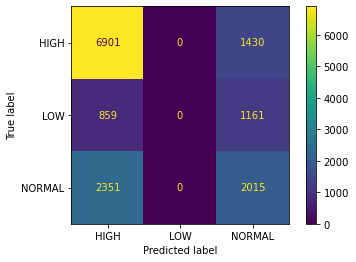

In [49]:
plot_confusion_matrix(clf, x_test, y_test)

In [62]:
clf.predict([[1,1,0,20]])

array(['HIGH'], dtype='<U6')

In [16]:
# Model 2 -> MLP Classifier

In [53]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(random_state=1, max_iter=200, hidden_layer_sizes=(128)).fit(x_train, y_train)

C:\Users\mailm\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [54]:
y_predicted=clf.predict(x_test)

In [55]:
clf.score(x_test, y_test)

0.8085207583067201

In [57]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[6901,    0, 1430],
       [ 859,    0, 1161],
       [2351,    0, 2015]], dtype=int64)

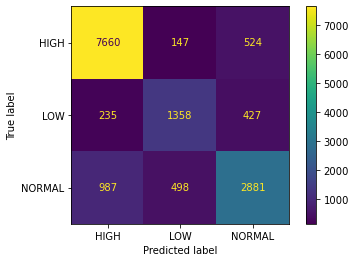

In [58]:
plot_confusion_matrix(clf, x_test, y_test)

In [61]:
clf.predict([[25,11,8,35]])

array(['HIGH'], dtype='<U6')